In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

# Interactive Session 6

In [2]:
k401k= woo.data('401k')
woo.data('401k',description=True)

name of dataset: 401k
no of variables: 8
no of observations: 1534

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| prate    | participation rate, percent     |
| mrate    | 401k plan match rate            |
| totpart  | total 401k participants         |
| totelg   | total eligible for 401k plan    |
| age      | age of 401k plan                |
| totemp   | total number of firm employees  |
| sole     | = 1 if 401k is firm's sole plan |
| ltotemp  | log of totemp                   |
+----------+---------------------------------+

L.E. Papke (1995), “Participation in and Contributions to 401(k)
Pension Plans:Evidence from Plan Data,” Journal of Human Resources 30,
311-325. Professor Papke kindly provided these data. She gathered them
from the Internal Revenue Service’s Form 5500 tapes.


In [3]:
k401k[['prate','mrate']].describe()

prate        mrate
count  1534.000000  1534.000000
mean     87.362907     0.731512
std      16.716537     0.779539
min       3.000000     0.010000
25%      78.025000     0.300000
50%      95.699997     0.460000
75%     100.000000     0.830000
max     100.000000     4.910000

In [4]:
mod=ols('prate~mrate',data=k401k).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  prate   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     123.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.10e-27
Time:                        09:15:56   Log-Likelihood:                -6437.0
No. Observations:                1534   AIC:                         1.288e+04
Df Residuals:                    1532   BIC:                         1.289e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.0755      0.563    147.484      0.0

In [5]:
#dir(mod)
e=mod.resid
yhat=mod.predict()

In [6]:
output=k401k[['mrate','prate']]
output['yhat']=yhat
output

<ipython-input-6-733936973a2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['yhat']=yhat


mrate       prate       yhat
0      0.21   26.100000  84.306282
1      1.42  100.000000  91.398188
2      0.91   97.599998  88.409038
3      0.42  100.000000  85.537109
4      0.53   82.500000  86.181827
...     ...         ...        ...
1529   0.33   85.099998  85.009612
1530   2.52  100.000000  97.845375
1531   2.27  100.000000  96.380105
1532   0.58  100.000000  86.474881
1533   0.45  100.000000  85.712941

[1534 rows x 3 columns]

<AxesSubplot:xlabel='yhat', ylabel='prate'>

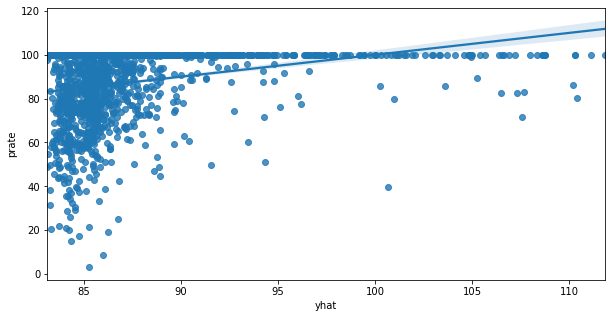

In [7]:
import seaborn as sns
sns.regplot(data=output,y='prate',x='yhat')

# Slides 6B,C

In [8]:
wage1= woo.data('wage1')
woo.data('wage1',description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

<AxesSubplot:xlabel='wage', ylabel='educ'>

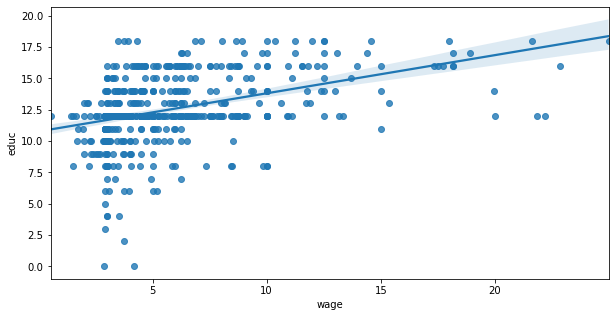

In [9]:
import seaborn as sns
sns.regplot(data=wage1,y='educ',x='wage')

In [10]:
wage1[['educ','wage']].corr()

educ      wage
educ  1.000000  0.405903
wage  0.405903  1.000000

In [11]:
mod=ols('wage~educ',data=wage1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           2.78e-22
Time:                        09:15:57   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9049      0.685     -1.321      0.1

In [12]:
mod=ols('lwage~educ',data=wage1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     119.6
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           3.27e-25
Time:                        09:15:57   Log-Likelihood:                -359.38
No. Observations:                 526   AIC:                             722.8
Df Residuals:                     524   BIC:                             731.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5838      0.097      5.998      0.0